In [229]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [230]:
desktopCluster_df = pd.read_csv('Results - Desktop Clusters.csv')

In [231]:
desktopTtest_df = pd.read_csv('T-Tests-DesktopClusters.csv')

In [232]:
desktopCluster_df.head()

country vertical  conversions  clickouts  conversion_rate  \
0    Albania  flights          610       2164         0.281885   
1    Algeria  flights         1052       6368         0.165201   
2  Argentina  flights        13442      37597         0.357529   
3    Armenia  flights          764       2824         0.270538   
4      Aruba  flights          196        920         0.213043   

   value_per_clickout  df_clickouts  df_conversions  mf_clickouts  \
0            0.060230         367.0           208.0        1086.0   
1            0.058461         490.0           180.0        4540.0   
2            0.139461        2386.0          1653.0        7351.0   
3            0.069981         788.0           426.0        1087.0   
4            0.052573         111.0            59.0         409.0   

   mf_conversions        ...         aggregators_db_conversion_rate  \
0           333.0        ...                               0.190955   
1           769.0        ...                               0.227848   
2          2720.0        ...                               0.189944   
3           235.0        ...                               0.272727   
4            90.0        ...                               0.095238   

   aggregators_db_value_per_clickout  aggregators_mb_conversion_rate  \
0                           0.014283                        0.109244   
1                           0.022982                        0.153846   
2                           0.033008                        0.115183   
3                           0.022225                        0.142857   
4                           0.009524                        0.115385   

   aggregators_mb_value_per_clickout  var_df_conversion_rate  \
0                           0.006387                0.000669   
1                           0.009231                0.000474   
2                           0.010890                0.000089   
3                           0.006429                0.000315   
4                           0.014872                0.002243   

   var_mf_conversion_rate  var_conversion_rate  percentage_df  percentage_mf  \
0                0.000196             0.000094       0.169593       0.501848   
1                0.000031             0.000022       0.076947       0.712940   
2                0.000032             0.000006       0.063463       0.195521   
3                0.000156             0.000070       0.279037       0.384915   
4                0.000420             0.000182       0.120652       0.444565   

   Clusters_Desktop  
0                 1  
1                 4  
2                 8  
3                 3  
4                 5  

[5 rows x 32 columns]

In [233]:
desktopCluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 32 columns):
country                              106 non-null object
vertical                             106 non-null object
conversions                          106 non-null int64
clickouts                            106 non-null int64
conversion_rate                      106 non-null float64
value_per_clickout                   106 non-null float64
df_clickouts                         106 non-null float64
df_conversions                       106 non-null float64
mf_clickouts                         106 non-null float64
mf_conversions                       106 non-null float64
metasearch_df_conversion_rate        106 non-null float64
metasearch_df_value_per_clickout     106 non-null float64
metasearch_mf_conversion_rate        106 non-null float64
metasearch_mf_value_per_clickout     106 non-null float64
metasearch_db_conversion_rate        106 non-null float64
metasearch_db_value_per_clickou

#### Extracting the countries and the clusters

In [234]:
countryandCluster = desktopCluster_df[['country', 'Clusters_Desktop']]

In [235]:
countryandCluster.head()

country  Clusters_Desktop
0    Albania                 1
1    Algeria                 4
2  Argentina                 8
3    Armenia                 3
4      Aruba                 5

In [236]:
countryandCluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
country             106 non-null object
Clusters_Desktop    106 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


### convert clusters number to int and keep the other clusters as country name

In [237]:
desktopTtest_df['cluster'] = [int(float(x)) if len(x) <= 3 else x for x in desktopTtest_df['Clusters_Desktop']]

In [238]:
desktopTtest_df.head(20)

Clusters_Desktop general_type  leave_behind url_advertiser_name  \
0               0.0     Computer         False          mediaalpha   
1               0.0     Computer         False          intent-geo   
2               0.0     Computer         False               kayak   
3               0.0     Computer         False          skyscanner   
4               0.0     Computer          True          mediaalpha   
5               0.0     Computer          True               kayak   
6               0.0     Computer          True          skyscanner   
7               0.0     Computer          True          intent-geo   
8               0.0       Tablet         False               kayak   
9               0.0       Tablet         False          intent-geo   
10              0.0       Tablet         False          mediaalpha   
11              0.0       Tablet         False          skyscanner   
12              0.0       Tablet          True          mediaalpha   
13              0.0       Tablet          True               kayak   
14              0.0       Tablet          True          intent-geo   
15              0.0       Tablet          True          skyscanner   
16              1.0     Computer         False          mediaalpha   
17              1.0     Computer         False               kayak   
18              1.0     Computer         False          intent-geo   
19              1.0     Computer         False          skyscanner   

    conversions  clickouts  value_conversions  conversion_rate  \
0          1679       2346         912.800000         0.715686   
1          1582       2075         685.521600         0.762410   
2           351       1119         367.336000         0.313673   
3            19         97          16.948468         0.195876   
4           383       2750         214.400000         0.139273   
5            80       1469         118.560000         0.054459   
6            78       1344         140.807380         0.058036   
7            77        303          21.763200         0.254125   
8           717       1935         737.944000         0.370543   
9           490        656         152.538400         0.746951   
10          212        450          60.560000         0.471111   
11            2         40           2.230166         0.050000   
12           33        477          12.340000         0.069182   
13           26        304          34.136000         0.085526   
14           72        264          14.103200         0.272727   
15           15        240          25.989465         0.062500   
16         2482       3600         397.480000         0.689444   
17          175        808          86.568000         0.216584   
18          195        295          16.928800         0.661017   
19            2         38           1.403962         0.052632   

    value_per_clickout  var_conversion_rate   ...    percentage  \
0             0.389088             0.000087   ...      0.416179   
1             0.330372             0.000087   ...      0.368104   
2             0.328272             0.000192   ...      0.198510   
3             0.174726             0.001624   ...      0.017208   
4             0.077964             0.000044   ...      0.468803   
5             0.080708             0.000035   ...      0.250426   
6             0.104767             0.000041   ...      0.229117   
7             0.071826             0.000626   ...      0.051654   
8             0.381366             0.000121   ...      0.628043   
9             0.232528             0.000288   ...      0.212918   
10            0.134578             0.000554   ...      0.146056   
11            0.055754             0.001187   ...      0.012983   
12            0.025870             0.000135   ...      0.371206   
13            0.112289             0.000257   ...      0.236576   
14            0.053421             0.000751   ...      0.205447   
15            0.108289             0.000244   ...      0.186770   
16    

In [239]:
desktop_ttest = desktopTtest_df.groupby(by=['cluster', 'url_advertiser_name', 'general_type', 'leave_behind', 'Value_Ttest']).agg({'clickouts':'sum'}).sort_values(['cluster', 'general_type', 'leave_behind']).reset_index()

In [240]:
desktop_ttest.head(20)

cluster url_advertiser_name general_type  leave_behind Value_Ttest  \
0        0          intent-geo     Computer         False           -   
1        0               kayak     Computer         False           -   
2        0          mediaalpha     Computer         False           -   
3        0          skyscanner     Computer         False           -   
4        0          intent-geo     Computer          True           -   
5        0               kayak     Computer          True           -   
6        0          mediaalpha     Computer          True           -   
7        0          skyscanner     Computer          True    Winner_1   
8        0          intent-geo       Tablet         False           -   
9        0               kayak       Tablet         False           -   
10       0          mediaalpha       Tablet         False           -   
11       0          skyscanner       Tablet         False           -   
12       0          intent-geo       Tablet          True    Winner_1   
13       0               kayak       Tablet          True           -   
14       0          mediaalpha       Tablet          True           -   
15       0          skyscanner       Tablet          True           -   
16       1          clicktripz     Computer         False           -   
17       1          intent-geo     Computer         False           -   
18       1               kayak     Computer         False           -   
19       1          mediaalpha     Computer         False           -   

    clickouts  
0        2075  
1        1119  
2        2346  
3          97  
4         303  
5        1469  
6        2750  
7        1344  
8         656  
9        1935  
10        450  
11         40  
12        264  
13        304  
14        477  
15        240  
16          2  
17        295  
18        808  
19       3600

In [241]:
desktop_ttest['ngroup'] = desktop_ttest.groupby(['cluster', 'general_type', 'leave_behind']).ngroup()

In [242]:
desktop_ttest[desktop_ttest['ngroup'] == 5].head(10)

cluster url_advertiser_name general_type  leave_behind Value_Ttest  \
21       1          intent-geo     Computer          True           -   
22       1               kayak     Computer          True           -   
23       1          mediaalpha     Computer          True           -   
24       1          skyscanner     Computer          True           -   

    clickouts  ngroup  
21       1028       5  
22         17       5  
23        568       5  
24       3203       5

In [243]:
# for i, ngroup in enumerate(desktop_ttest['ngroup']):
#     if desktop_ttest[(desktop_ttest['ngroup'] == ngroup) & (desktop_ttest['Value_Ttest'] == 'Winner_1')]:
#         print(desktop_ttest['url_advertiser_name'].loc[i])

In [244]:
winner_dict = {}
for i in range(0, (desktop_ttest['ngroup'].nunique()-1)):
    temp_df = desktop_ttest[desktop_ttest['ngroup'] == i]
    #print(temp_df)
    max_clickouts_per_cluster = 0
    max_clickouts_partner = ''
    for j, value in enumerate(temp_df['Value_Ttest']):
#         print('*****')
#         print(value)
#         print('*****')
        temp_max_clickouts_per_cluster = max(max_clickouts_per_cluster, temp_df['clickouts'].iloc[j])
        if temp_max_clickouts_per_cluster != max_clickouts_per_cluster:
            max_clickouts_partner = temp_df['url_advertiser_name'].iloc[j]
            max_clickouts_per_cluster = temp_max_clickouts_per_cluster
        
        if value == 'Winner_1':
            winner_name = temp_df['url_advertiser_name'].iloc[j]
            winner_dict.update({i:winner_name})
        
    if i not in winner_dict.keys(): 
        winner_dict.update({i:max_clickouts_partner})
            
print(winner_dict)
desktop_ttest['winner'] = desktop_ttest['ngroup'].map(winner_dict)

    

{0: 'mediaalpha', 1: 'skyscanner', 2: 'kayak', 3: 'intent-geo', 4: 'mediaalpha', 5: 'skyscanner', 6: 'mediaalpha', 7: 'skyscanner', 8: 'mediaalpha', 9: 'skyscanner', 10: 'kayak', 11: 'skyscanner', 12: 'mediaalpha', 13: 'skyscanner', 14: 'kayak', 15: 'skyscanner', 16: 'skyscanner', 17: 'skyscanner', 18: 'kayak', 19: 'skyscanner', 20: 'kayak', 21: 'skyscanner', 22: 'kayak', 23: 'skyscanner', 24: 'intent-geo', 25: 'kayak', 26: 'kayak', 27: 'kayak', 28: 'mediaalpha', 29: 'skyscanner', 30: 'mediaalpha', 31: 'skyscanner', 32: 'mediaalpha', 33: 'kayak', 34: 'kayak', 35: 'kayak', 36: 'mediaalpha', 37: 'skyscanner', 38: 'kayak', 39: 'skyscanner', 40: 'mediaalpha', 41: 'mediaalpha', 42: 'mediaalpha', 43: 'skyscanner', 44: 'intent-geo', 45: 'skyscanner', 46: 'mediaalpha', 47: 'skyscanner', 48: 'kayak', 49: 'mediaalpha', 50: 'kayak', 51: 'mediaalpha', 52: 'intent-geo', 53: 'skyscanner', 54: 'kayak', 55: 'mediaalpha', 56: 'skyscanner', 57: 'mediaalpha', 58: 'skyscanner', 59: 'kayak', 60: 'skyscanne

## function def that will split clusters from contry names

In [245]:
def split_int_and_str(clusters):
    if 'int' in str(type(clusters)):
        return int(float(clusters))
    elif clusters == '10.0' or clusters == '11.0':
        return int(float(clusters))


In [246]:
desktop_ttest['final_cluster'] = desktop_ttest['cluster'].apply(split_int_and_str)

In [247]:
desktop_ttest.head()

cluster url_advertiser_name general_type  leave_behind Value_Ttest  \
0       0          intent-geo     Computer         False           -   
1       0               kayak     Computer         False           -   
2       0          mediaalpha     Computer         False           -   
3       0          skyscanner     Computer         False           -   
4       0          intent-geo     Computer          True           -   

   clickouts  ngroup      winner  final_cluster  
0       2075       0  mediaalpha            0.0  
1       1119       0  mediaalpha            0.0  
2       2346       0  mediaalpha            0.0  
3         97       0  mediaalpha            0.0  
4        303       1  skyscanner            0.0

In [248]:
desktop_ttest['cluster'] = desktop_ttest['cluster'].apply(lambda x: int(float(x)) if x == '10.0' or x == '11.0' else x)

# Merging results with clusters country names

In [249]:
merged_df = pd.merge(desktop_ttest, countryandCluster, left_on='final_cluster', right_on='Clusters_Desktop', how='left')

In [250]:
#merged_df.to_csv('clusters.csv')

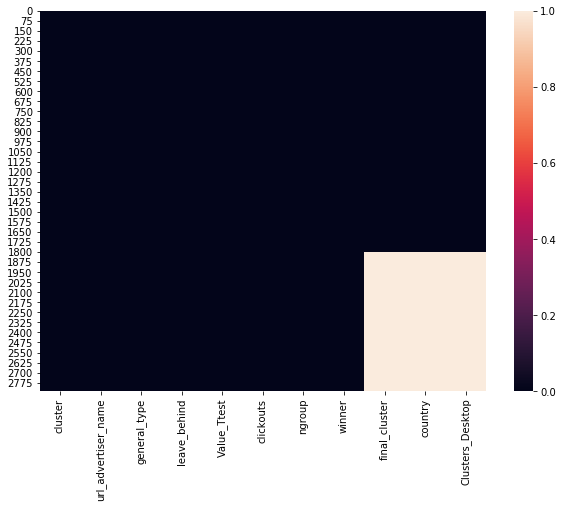

In [251]:
plt.figure(figsize=(10,7))
sns.heatmap(merged_df.isnull())

In [252]:
#merged_df[merged_df['Value_Ttest'] == 'Winner_1']

In [253]:
df_with_results.head()

cluster general_type  leave_behind      winner cluster_and_country
0       0     Computer         False  mediaalpha             Ireland
1       0     Computer         False  mediaalpha         Netherlands
2       0     Computer         False  mediaalpha         New Zealand
3       0     Computer         False  mediaalpha           Singapore
4       0     Computer         False  mediaalpha      United Kingdom

# merging countrues with individual countries
###### countries that have no cluster number are now merged to one column with all countries names

In [254]:
merged_df['country'] = merged_df['country'].apply(lambda x: 'no country' if 'str' not in str(type(x)) else x)

In [255]:
df_with_results = merged_df.groupby(by=(['cluster', 'general_type', 'leave_behind', 'winner', 'country'])).agg({'clickouts':'sum'}).reset_index()

In [256]:
df_with_results['cluster_and_country'] = [a if 'str' in str(type(a)) else b for a,b in zip(df_with_results['cluster'], df_with_results['country'])]

In [257]:
df_with_results = df_with_results[['cluster', 'general_type', 'leave_behind', 'winner', 'cluster_and_country']]

#### checking with original cluster output

In [258]:
df_with_results['cluster_and_country'][df_with_results['cluster'] == 1].unique()

array(['Albania', 'Azerbaijan', 'Belarus', 'Croatia', 'Czechia',
       'Estonia', 'Kazakhstan', 'North Macedonia', 'Oman', 'Palestine',
       'Poland', 'Republic of Moldova', 'Turkey'], dtype=object)

In [259]:
countryandCluster[countryandCluster['Clusters_Desktop'] == 1]

country  Clusters_Desktop
0               Albania                 1
6            Azerbaijan                 1
10              Belarus                 1
20              Croatia                 1
23              Czechia                 1
29              Estonia                 1
51           Kazakhstan                 1
67      North Macedonia                 1
69                 Oman                 1
71            Palestine                 1
76               Poland                 1
81  Republic of Moldova                 1
98               Turkey                 1

# uploading the country code file and merging both files

In [260]:
c_code_df = pd.read_csv('country_code.csv')

In [261]:
c_code_df.drop(columns='amount', inplace=True)

In [262]:
c_code_df.head()

datadb_country_code    country_name
0                  AF     Afghanistan
1                  AL         Albania
2                  DZ         Algeria
3                  AS  American Samoa
4                  AS  American Samoa

In [263]:
final_df_with_country_code = pd.merge(df_with_results, c_code_df, left_on='cluster_and_country', right_on='country_name')

In [264]:
final_df_with_country_code.head()

cluster general_type  leave_behind      winner cluster_and_country  \
0       0     Computer         False  mediaalpha             Ireland   
1       0     Computer          True  skyscanner             Ireland   
2       0       Tablet         False       kayak             Ireland   
3       0       Tablet          True  intent-geo             Ireland   
4       0     Computer         False  mediaalpha         Netherlands   

  datadb_country_code country_name  
0                  IE      Ireland  
1                  IE      Ireland  
2                  IE      Ireland  
3                  IE      Ireland  
4                  NL  Netherlands

### checking for errors and null values

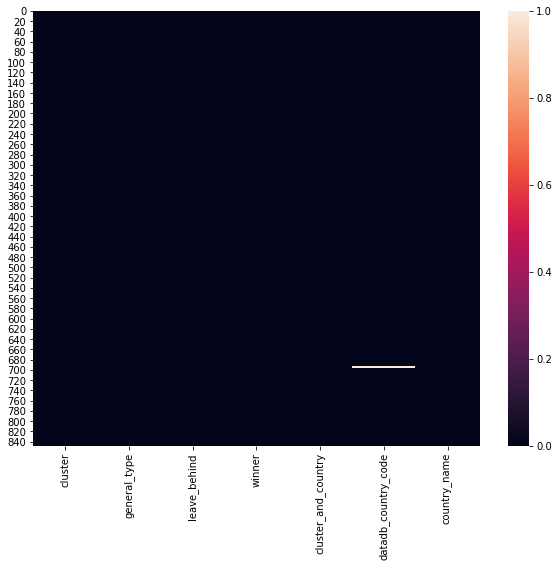

In [265]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df_with_country_code.isnull())

In [266]:
final_df_with_country_code[final_df_with_country_code['datadb_country_code'].isnull()]

cluster general_type  leave_behind      winner cluster_and_country  \
694  Namibia     Computer         False  mediaalpha             Namibia   
695  Namibia     Computer          True  mediaalpha             Namibia   
696  Namibia       Tablet         False       kayak             Namibia   
697  Namibia       Tablet          True  skyscanner             Namibia   

    datadb_country_code country_name  
694                 NaN      Namibia  
695                 NaN      Namibia  
696                 NaN      Namibia  
697                 NaN      Namibia

##### fixing issue on Namibia rows

In [267]:
final_df_with_country_code['datadb_country_code'][final_df_with_country_code['country_name'] == 'Namibia'] = 'NA'

C:\Users\idan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [268]:
final_df_with_country_code[final_df_with_country_code['country_name'] == 'Namibia']

cluster general_type  leave_behind      winner cluster_and_country  \
694  Namibia     Computer         False  mediaalpha             Namibia   
695  Namibia     Computer          True  mediaalpha             Namibia   
696  Namibia       Tablet         False       kayak             Namibia   
697  Namibia       Tablet          True  skyscanner             Namibia   

    datadb_country_code country_name  
694                  NA      Namibia  
695                  NA      Namibia  
696                  NA      Namibia  
697                  NA      Namibia

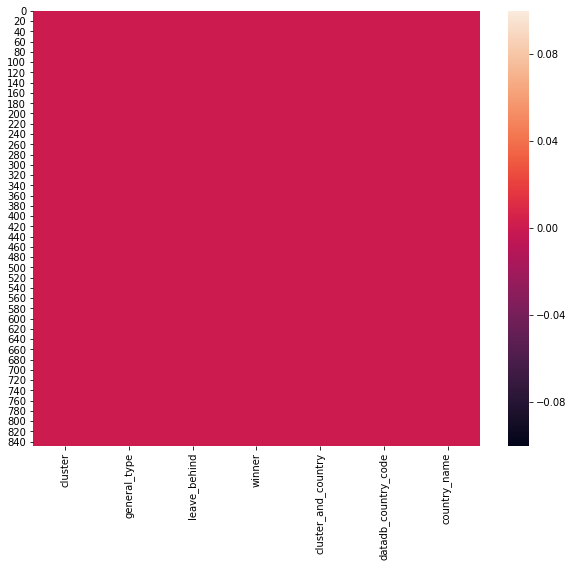

In [269]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df_with_country_code.isnull())

In [270]:
final_df_with_country_code[final_df_with_country_code['datadb_country_code'].isnull()]

Empty DataFrame
Columns: [cluster, general_type, leave_behind, winner, cluster_and_country, datadb_country_code, country_name]
Index: []

In [271]:
final_df_with_country_code['winner'].unique()

array(['mediaalpha', 'skyscanner', 'kayak', 'intent-geo', 'intent'],
      dtype=object)

### creating partners dictionary

In [272]:
partners_dict = {'mediaalpha':1, 
                'MEDIA_ALPHA_WIDGET':2,
                'intent':3,
                'intent-geo':4,
                'kayak':5,
                'skyscanner':6,
                'RENTALCARS':7,
                'AUTORENTALS':8,
                'BOOKING_BUDDY':9,
                'TRIPBASE':10,
                'NONE':11,
                'CLICKTRIPZ':12,
                'HOTELS_COMBINED':13,
                'SMARTFARES':14}

In [273]:
final_df_with_country_code['partners_code'] = final_df_with_country_code['winner'].map(partners_dict)

In [274]:
final_df_with_country_code.head()

cluster general_type  leave_behind      winner cluster_and_country  \
0       0     Computer         False  mediaalpha             Ireland   
1       0     Computer          True  skyscanner             Ireland   
2       0       Tablet         False       kayak             Ireland   
3       0       Tablet          True  intent-geo             Ireland   
4       0     Computer         False  mediaalpha         Netherlands   

  datadb_country_code country_name  partners_code  
0                  IE      Ireland              1  
1                  IE      Ireland              6  
2                  IE      Ireland              5  
3                  IE      Ireland              4  
4                  NL  Netherlands              1

In [275]:
final_df_with_country_code_full = final_df_with_country_code.copy()

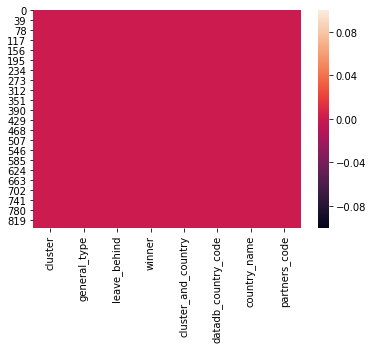

In [276]:
sns.heatmap(final_df_with_country_code.isnull())

In [277]:
#final_df_with_country_code.to_csv('desktop_matrix.csv', index=False)

### cleaning non relevant columns

In [278]:
final_df_with_country_code['leave_behind'] = final_df_with_country_code['leave_behind'].apply(lambda x: 'f' if x==False else 'b')

In [279]:
final_df_with_country_code.head(10)

cluster general_type leave_behind      winner cluster_and_country  \
0       0     Computer            f  mediaalpha             Ireland   
1       0     Computer            b  skyscanner             Ireland   
2       0       Tablet            f       kayak             Ireland   
3       0       Tablet            b  intent-geo             Ireland   
4       0     Computer            f  mediaalpha         Netherlands   
5       0     Computer            b  skyscanner         Netherlands   
6       0       Tablet            f       kayak         Netherlands   
7       0       Tablet            b  intent-geo         Netherlands   
8       0     Computer            f  mediaalpha         New Zealand   
9       0     Computer            b  skyscanner         New Zealand   

  datadb_country_code country_name  partners_code  
0                  IE      Ireland              1  
1                  IE      Ireland              6  
2                  IE      Ireland              5  
3                  IE      Ireland              4  
4                  NL  Netherlands              1  
5                  NL  Netherlands              6  
6                  NL  Netherlands              5  
7                  NL  Netherlands              4  
8                  NZ  New Zealand              1  
9                  NZ  New Zealand              6

In [280]:
final_df_with_country_code.drop(columns=['cluster', 'winner', 'cluster_and_country', 'country_name'], inplace=True)

In [281]:
final_df_with_country_code.to_csv('desktop_matrix.csv', index=False)

In [282]:
final_df_with_country_code['partners_code'].value_counts()

6    326
1    304
5    164
4     53
3      1
Name: partners_code, dtype: int64

In [284]:
final_df_with_country_code[final_df_with_country_code['datadb_country_code'] == 'US']

general_type leave_behind datadb_country_code  partners_code
827     Computer            f                  US              1
828     Computer            b                  US              1
829       Tablet            f                  US              3
830       Tablet            b                  US              5

### checking the full data frame

In [226]:
final_df_with_country_code_full[['partners_code', 'winner']].head(10)

partners_code      winner
0              1  mediaalpha
1              6  skyscanner
2              5       kayak
3              4  intent-geo
4              1  mediaalpha
5              6  skyscanner
6              5       kayak
7              4  intent-geo
8              1  mediaalpha
9              6  skyscanner

In [291]:
# for cluster in final_df_with_country_code_full['cluster'].unique():
#     print('cluster is %d' %cluster)
#     print(final_df_with_country_code_full['partners_code'][final_df_with_country_code_full['cluster'] == cluster].value_counts())

In [228]:
final_df_with_country_code_full['cluster_and_country'][final_df_with_country_code_full['cluster'] == 1].unique()

array(['Albania', 'Azerbaijan', 'Belarus', 'Croatia', 'Czechia',
       'Estonia', 'Kazakhstan', 'North Macedonia', 'Oman', 'Palestine',
       'Poland', 'Republic of Moldova', 'Turkey'], dtype=object)

In [57]:
final_df_with_country_code_full[(final_df_with_country_code_full['cluster'] == 1) & (final_df_with_country_code_full['cluster_and_country']  == 'Kenya')]

Empty DataFrame
Columns: [cluster, general_type, leave_behind, winner, cluster_and_country, datadb_country_code, country_name, partners_code]
Index: []

### Generated matrix table

In [292]:
final_df_with_country_code.head(20)

general_type leave_behind datadb_country_code  partners_code
0      Computer            f                  IE              1
1      Computer            b                  IE              6
2        Tablet            f                  IE              5
3        Tablet            b                  IE              4
4      Computer            f                  NL              1
5      Computer            b                  NL              6
6        Tablet            f                  NL              5
7        Tablet            b                  NL              4
8      Computer            f                  NZ              1
9      Computer            b                  NZ              6
10       Tablet            f                  NZ              5
11       Tablet            b                  NZ              4
12     Computer            f                  SG              1
13     Computer            b                  SG              6
14       Tablet            f                  SG              5
15       Tablet            b                  SG              4
16     Computer            f                  GB              1
17     Computer            b                  GB              6
18       Tablet            f                  GB              5
19       Tablet            b                  GB              4

# Mobile Matrix
Creating the mobile matrix based on same functions. defining everything again.

In [293]:
mobileCluster_df = pd.read_csv('Results - Mobile Clusters.csv')
mobileTtest_df = pd.read_csv('T-Tests-MobileClusters.csv')

###### Diaplsy the data frames

In [295]:
mobileCluster_df.head()

country vertical  conversions  clickouts  conversion_rate  \
0    Albania  flights          610       2164         0.281885   
1    Algeria  flights         1052       6368         0.165201   
2  Argentina  flights        13442      37597         0.357529   
3    Armenia  flights          764       2824         0.270538   
4      Aruba  flights          196        920         0.213043   

   value_per_clickout  df_clickouts  df_conversions  mf_clickouts  \
0            0.060230         367.0           208.0        1086.0   
1            0.058461         490.0           180.0        4540.0   
2            0.139461        2386.0          1653.0        7351.0   
3            0.069981         788.0           426.0        1087.0   
4            0.052573         111.0            59.0         409.0   

   mf_conversions       ...         aggregators_db_conversion_rate  \
0           333.0       ...                               0.190955   
1           769.0       ...                               0.227848   
2          2720.0       ...                               0.189944   
3           235.0       ...                               0.272727   
4            90.0       ...                               0.095238   

   aggregators_db_value_per_clickout  aggregators_mb_conversion_rate  \
0                           0.014283                        0.109244   
1                           0.022982                        0.153846   
2                           0.033008                        0.115183   
3                           0.022225                        0.142857   
4                           0.009524                        0.115385   

   aggregators_mb_value_per_clickout  var_df_conversion_rate  \
0                           0.006387                0.000669   
1                           0.009231                0.000474   
2                           0.010890                0.000089   
3                           0.006429                0.000315   
4                           0.014872                0.002243   

   var_mf_conversion_rate  var_conversion_rate  percentage_df  percentage_mf  \
0                0.000196             0.000094       0.169593       0.501848   
1                0.000031             0.000022       0.076947       0.712940   
2                0.000032             0.000006       0.063463       0.195521   
3                0.000156             0.000070       0.279037       0.384915   
4                0.000420             0.000182       0.120652       0.444565   

   Clusters_Mobile  
0                3  
1                8  
2                7  
3               11  
4                1  

[5 rows x 32 columns]

In [296]:
mobileTtest_df.head()

Clusters_Mobile general_type  leave_behind url_advertiser_name  conversions  \
0             0.0       Mobile         False               kayak         1056   
1             0.0       Mobile         False          skyscanner          202   
2             0.0       Mobile         False          mediaalpha          504   
3             0.0       Mobile         False          intent-geo          170   
4             0.0       Mobile         False          clicktripz            7   

   clickouts  value_conversions  conversion_rate  value_per_clickout  \
0       4327         885.920000         0.244049            0.204742   
1       1284         186.557996         0.157321            0.145294   
2        630          55.790000         0.800000            0.088556   
3        208          15.327200         0.817308            0.073688   
4          8           1.258000         0.875000            0.157250   

   var_conversion_rate  total_clickouts  percentage  \
0             0.000043             6457    0.670125   
1             0.000103             6457    0.198854   
2             0.000254             6457    0.097569   
3             0.000718             6457    0.032213   
4             0.013672             6457    0.001239   

   conversion_rates_plus_percentage  CVRTtest CVRTtest_Significance  \
0                          0.163543         -                     -   
1                          0.031284         -                     -   
2                          0.078055  Winner_2            100.000000   
3                          0.026328  Winner_1            100.000000   
4                          0.001084         -                     -   

   value_per_conversion  synthetic_variance  \
0              0.838939            0.129847   
1              0.923554            0.113077   
2              0.110694            0.001961   
3              0.090160            0.001214   
4              0.179714            0.003533   

   value_per_clickout_times_percentage Value_Ttest Value_TtestSignificance  
0                             0.137203           -                       -  
1                             0.028892           -                       -  
2                             0.008640           -                       -  
3                             0.002374           -                       -  
4                             0.000195           -                       -

In [297]:
mobileCluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 32 columns):
country                              131 non-null object
vertical                             131 non-null object
conversions                          131 non-null int64
clickouts                            131 non-null int64
conversion_rate                      131 non-null float64
value_per_clickout                   131 non-null float64
df_clickouts                         131 non-null float64
df_conversions                       131 non-null float64
mf_clickouts                         131 non-null float64
mf_conversions                       131 non-null float64
metasearch_df_conversion_rate        131 non-null float64
metasearch_df_value_per_clickout     131 non-null float64
metasearch_mf_conversion_rate        131 non-null float64
metasearch_mf_value_per_clickout     131 non-null float64
metasearch_db_conversion_rate        131 non-null float64
metasearch_db_value_per_clickou

In [298]:
mobileTtest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
Clusters_Mobile                        576 non-null object
general_type                           576 non-null object
leave_behind                           576 non-null bool
url_advertiser_name                    576 non-null object
conversions                            576 non-null int64
clickouts                              576 non-null int64
value_conversions                      576 non-null float64
conversion_rate                        576 non-null float64
value_per_clickout                     576 non-null float64
var_conversion_rate                    576 non-null float64
total_clickouts                        576 non-null int64
percentage                             576 non-null float64
conversion_rates_plus_percentage       576 non-null float64
CVRTtest                               576 non-null object
CVRTtest_Significance                  576 non-null object
value_per

#### Extracting the countries and the clusters

In [300]:
countryAndCluster_mobile = mobileCluster_df[['country', 'Clusters_Mobile']]

In [301]:
countryAndCluster_mobile.head()

country  Clusters_Mobile
0    Albania                3
1    Algeria                8
2  Argentina                7
3    Armenia               11
4      Aruba                1

In [302]:
countryandCluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
country             106 non-null object
Clusters_Desktop    106 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


### convert clusters number to int and keep the other clusters as country name

In [305]:
mobileTtest_df['cluster'] = [int(float(x)) if len(x) <= 3 else x for x in mobileTtest_df['Clusters_Mobile']]

In [306]:
mobileTtest_df.head(20)

Clusters_Mobile general_type  leave_behind url_advertiser_name  \
0              0.0       Mobile         False               kayak   
1              0.0       Mobile         False          skyscanner   
2              0.0       Mobile         False          mediaalpha   
3              0.0       Mobile         False          intent-geo   
4              0.0       Mobile         False          clicktripz   
5              0.0       Mobile          True          skyscanner   
6              0.0       Mobile          True          mediaalpha   
7              0.0       Mobile          True               kayak   
8              0.0       Mobile          True          intent-geo   
9              1.0       Mobile         False               kayak   
10             1.0       Mobile         False          mediaalpha   
11             1.0       Mobile         False          intent-geo   
12             1.0       Mobile         False          skyscanner   
13             1.0       Mobile         False          clicktripz   
14             1.0       Mobile          True               kayak   
15             1.0       Mobile          True          skyscanner   
16             1.0       Mobile          True          mediaalpha   
17             1.0       Mobile          True          intent-geo   
18             2.0       Mobile         False               kayak   
19             2.0       Mobile         False          mediaalpha   

    conversions  clickouts  value_conversions  conversion_rate  \
0          1056       4327         885.920000         0.244049   
1           202       1284         186.557996         0.157321   
2           504        630          55.790000         0.800000   
3           170        208          15.327200         0.817308   
4             7          8           1.258000         0.875000   
5            33       1051          32.656369         0.031399   
6            66        298          10.560000         0.221477   
7            27        111          18.080000         0.243243   
8             2         12           0.416800         0.166667   
9           599       7729         287.816000         0.077500   
10         1594       1886         169.220000         0.845175   
11          874       1098          55.403200         0.795993   
12            6         49           2.620996         0.122449   
13           11         13           1.302000         0.846154   
14          225       3803          80.960000         0.059164   
15           50       1929          40.596172         0.025920   
16          110        987          10.080000         0.111449   
17            5         12           1.020000         0.416667   
18          130        548          39.944000         0.237226   
19           37         61           2.400000         0.606557   

    value_per_clickout  var_conversion_rate   ...    percentage  \
0             0.204742             0.000043   ...      0.670125   
1             0.145294             0.000103   ...      0.198854   
2             0.088556             0.000254   ...      0.097569   
3             0.073688             0.000718   ...      0.032213   
4             0.157250             0.013672   ...      0.001239   
5             0.031072             0.000029   ...      0.713995   
6             0.035436             0.000579   ...      0.202446   
7             0.162883             0.001658   ...      0.075408   
8             0.034733             0.011574   ...      0.008152   
9             0.037238             0.000009   ...      0.717309   
10            0.089724             0.000069   ...      0.175035   
11            0.050458             0.000148   ...      0.101903   
12            0.053490             0.002193   ...      0.004548   
13            0.100154             0.010014   ...      0.001206   
14            0.021288             0.000015   ...      0.564998   
15            0.021045             0.000013   ...      0.286584   
16            0.010213     

In [307]:
mobile_ttest = mobileTtest_df.groupby(by=['cluster', 'url_advertiser_name', 'general_type', 'leave_behind', 'Value_Ttest']).agg({'clickouts':'sum'}).sort_values(['cluster', 'general_type', 'leave_behind']).reset_index()

In [309]:
mobile_ttest.head(20)

cluster url_advertiser_name general_type  leave_behind Value_Ttest  \
0        0          clicktripz       Mobile         False           -   
1        0          intent-geo       Mobile         False           -   
2        0               kayak       Mobile         False           -   
3        0          mediaalpha       Mobile         False           -   
4        0          skyscanner       Mobile         False           -   
5        0          intent-geo       Mobile          True           -   
6        0               kayak       Mobile          True           -   
7        0          mediaalpha       Mobile          True           -   
8        0          skyscanner       Mobile          True           -   
9        1          clicktripz       Mobile         False           -   
10       1          intent-geo       Mobile         False    Winner_2   
11       1               kayak       Mobile         False           -   
12       1          mediaalpha       Mobile         False    Winner_1   
13       1          skyscanner       Mobile         False           -   
14       1          intent-geo       Mobile          True           -   
15       1               kayak       Mobile          True           -   
16       1          mediaalpha       Mobile          True           -   
17       1          skyscanner       Mobile          True           -   
18       2          intent-geo       Mobile         False           -   
19       2               kayak       Mobile         False           -   

    clickouts  
0           8  
1         208  
2        4327  
3         630  
4        1284  
5          12  
6         111  
7         298  
8        1051  
9          13  
10       1098  
11       7729  
12       1886  
13         49  
14         12  
15       3803  
16        987  
17       1929  
18         48  
19        548

### Grouping under numbers each sub segment per cluster

In [310]:
mobile_ttest['ngroup'] = mobile_ttest.groupby(['cluster', 'general_type', 'leave_behind']).ngroup()

In [312]:
mobile_ttest.head(20)

cluster url_advertiser_name general_type  leave_behind Value_Ttest  \
0        0          clicktripz       Mobile         False           -   
1        0          intent-geo       Mobile         False           -   
2        0               kayak       Mobile         False           -   
3        0          mediaalpha       Mobile         False           -   
4        0          skyscanner       Mobile         False           -   
5        0          intent-geo       Mobile          True           -   
6        0               kayak       Mobile          True           -   
7        0          mediaalpha       Mobile          True           -   
8        0          skyscanner       Mobile          True           -   
9        1          clicktripz       Mobile         False           -   
10       1          intent-geo       Mobile         False    Winner_2   
11       1               kayak       Mobile         False           -   
12       1          mediaalpha       Mobile         False    Winner_1   
13       1          skyscanner       Mobile         False           -   
14       1          intent-geo       Mobile          True           -   
15       1               kayak       Mobile          True           -   
16       1          mediaalpha       Mobile          True           -   
17       1          skyscanner       Mobile          True           -   
18       2          intent-geo       Mobile         False           -   
19       2               kayak       Mobile         False           -   

    clickouts  ngroup  
0           8       0  
1         208       0  
2        4327       0  
3         630       0  
4        1284       0  
5          12       1  
6         111       1  
7         298       1  
8        1051       1  
9          13       2  
10       1098       2  
11       7729       2  
12       1886       2  
13         49       2  
14         12       3  
15       3803       3  
16        987       3  
17       1929       3  
18         48       4  
19        548       4

In [313]:
winner_dict = {}
for i in range(0, (mobile_ttest['ngroup'].nunique()-1)):
    temp_df = mobile_ttest[mobile_ttest['ngroup'] == i]
    #print(temp_df)
    max_clickouts_per_cluster = 0
    max_clickouts_partner = ''
    for j, value in enumerate(temp_df['Value_Ttest']):
#         print('*****')
#         print(value)
#         print('*****')
        temp_max_clickouts_per_cluster = max(max_clickouts_per_cluster, temp_df['clickouts'].iloc[j])
        if temp_max_clickouts_per_cluster != max_clickouts_per_cluster:
            max_clickouts_partner = temp_df['url_advertiser_name'].iloc[j]
            max_clickouts_per_cluster = temp_max_clickouts_per_cluster
        
        if value == 'Winner_1':
            winner_name = temp_df['url_advertiser_name'].iloc[j]
            winner_dict.update({i:winner_name})
        
    if i not in winner_dict.keys(): 
        winner_dict.update({i:max_clickouts_partner})
            
print(winner_dict)
mobile_ttest['winner'] = mobile_ttest['ngroup'].map(winner_dict)

    

{0: 'kayak', 1: 'skyscanner', 2: 'mediaalpha', 3: 'kayak', 4: 'kayak', 5: 'skyscanner', 6: 'skyscanner', 7: 'skyscanner', 8: 'kayak', 9: 'skyscanner', 10: 'kayak', 11: 'skyscanner', 12: 'kayak', 13: 'kayak', 14: 'kayak', 15: 'kayak', 16: 'clicktripz', 17: 'skyscanner', 18: 'kayak', 19: 'skyscanner', 20: 'mediaalpha', 21: 'kayak', 22: 'mediaalpha', 23: 'skyscanner', 24: 'kayak', 25: 'mediaalpha', 26: 'mediaalpha', 27: 'kayak', 28: 'kayak', 29: 'kayak', 30: 'skyscanner', 31: 'kayak', 32: 'mediaalpha', 33: 'kayak', 34: 'skyscanner', 35: 'kayak', 36: 'skyscanner', 37: 'kayak', 38: 'skyscanner', 39: 'kayak', 40: 'mediaalpha', 41: 'kayak', 42: 'mediaalpha', 43: 'kayak', 44: 'kayak', 45: 'kayak', 46: 'skyscanner', 47: 'kayak', 48: 'skyscanner', 49: 'kayak', 50: 'skyscanner', 51: 'kayak', 52: 'mediaalpha', 53: 'mediaalpha', 54: 'skyscanner', 55: 'kayak', 56: 'skyscanner', 57: 'kayak', 58: 'mediaalpha', 59: 'kayak', 60: 'skyscanner', 61: 'kayak', 62: 'kayak', 63: 'kayak', 64: 'skyscanner', 65: 

#### Handling str in cluster numbers - transform to int

In [325]:
mobile_ttest['cluster'] = mobile_ttest['cluster'].apply(lambda x: int(float(x)) if x == '10.0' or x == '11.0' else x)

In [327]:
mobile_ttest[mobile_ttest['cluster'] == 10]

cluster url_advertiser_name general_type  leave_behind Value_Ttest  \
85      10          clicktripz       Mobile         False           -   
86      10          intent-geo       Mobile         False           -   
87      10               kayak       Mobile         False           -   
88      10          mediaalpha       Mobile         False    Winner_1   
89      10          skyscanner       Mobile         False    Winner_2   
90      10          intent-geo       Mobile          True           -   
91      10               kayak       Mobile          True           -   
92      10          mediaalpha       Mobile          True           -   
93      10          skyscanner       Mobile          True           -   

    clickouts  ngroup      winner  final_cluster  
85          5      20  mediaalpha           10.0  
86       2411      20  mediaalpha           10.0  
87      17419      20  mediaalpha           10.0  
88       5773      20  mediaalpha           10.0  
89       2800      20  mediaalpha           10.0  
90       1619      21       kayak           10.0  
91      20126      21       kayak           10.0  
92        969      21       kayak           10.0  
93       7256      21       kayak           10.0

## Merging results with clusters country names

In [330]:
mobileMerged_df = pd.merge(mobile_ttest, countryAndCluster_mobile, left_on='final_cluster', right_on='Clusters_Mobile', how='left')

In [331]:
mobileMerged_df.head()

cluster url_advertiser_name general_type  leave_behind Value_Ttest  \
0       0          clicktripz       Mobile         False           -   
1       0          clicktripz       Mobile         False           -   
2       0          clicktripz       Mobile         False           -   
3       0          clicktripz       Mobile         False           -   
4       0          clicktripz       Mobile         False           -   

   clickouts  ngroup winner  final_cluster      country  Clusters_Mobile  
0          8       0  kayak            0.0      Austria              0.0  
1          8       0  kayak            0.0   Guadeloupe              0.0  
2          8       0  kayak            0.0   Martinique              0.0  
3          8       0  kayak            0.0  New Zealand              0.0  
4          8       0  kayak            0.0      Réunion              0.0

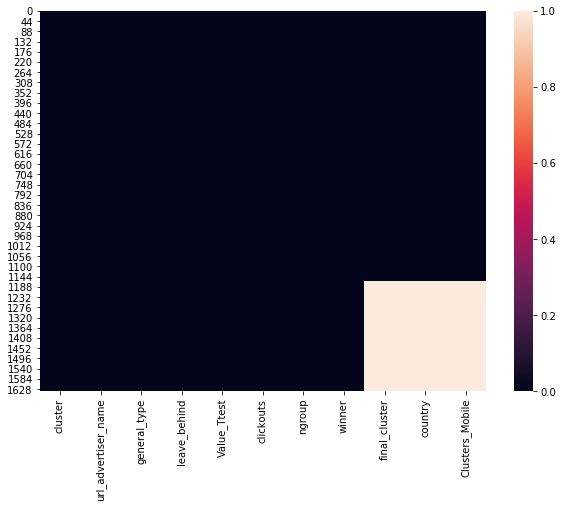

In [332]:
plt.figure(figsize=(10,7))
sns.heatmap(mobileMerged_df.isnull())

## Merge clusters with individual countries
#### countries that have no cluster number are now merged to one column with all countries names

In [333]:
mobileMerged_df['country'] = mobileMerged_df['country'].apply(lambda x: 'no country' if 'str' not in str(type(x)) else x)

In [335]:
mobile_df_with_results = mobileMerged_df.groupby(by=(['cluster', 'general_type', 'leave_behind', 'winner', 'country'])).agg({'clickouts':'sum'}).reset_index()

In [336]:
mobile_df_with_results['cluster_and_country'] = [a if 'str' in str(type(a)) else b for a,b in zip(mobile_df_with_results['cluster'], mobile_df_with_results['country'])]

In [337]:
mobile_df_with_results = mobile_df_with_results[['cluster', 'general_type', 'leave_behind', 'winner', 'cluster_and_country']]

## Merging country code with countries

In [338]:
c_code_df.head()

datadb_country_code    country_name
0                  AF     Afghanistan
1                  AL         Albania
2                  DZ         Algeria
3                  AS  American Samoa
4                  AS  American Samoa

In [339]:
final_mobile_df_with_country_code = pd.merge(mobile_df_with_results, c_code_df, left_on='cluster_and_country', right_on='country_name')

In [340]:
final_mobile_df_with_country_code.head()

cluster general_type  leave_behind      winner cluster_and_country  \
0       0       Mobile         False       kayak             Austria   
1       0       Mobile          True  skyscanner             Austria   
2       0       Mobile         False       kayak          Guadeloupe   
3       0       Mobile          True  skyscanner          Guadeloupe   
4       0       Mobile         False       kayak          Martinique   

  datadb_country_code country_name  
0                  AT      Austria  
1                  AT      Austria  
2                  GP   Guadeloupe  
3                  GP   Guadeloupe  
4                  MQ   Martinique

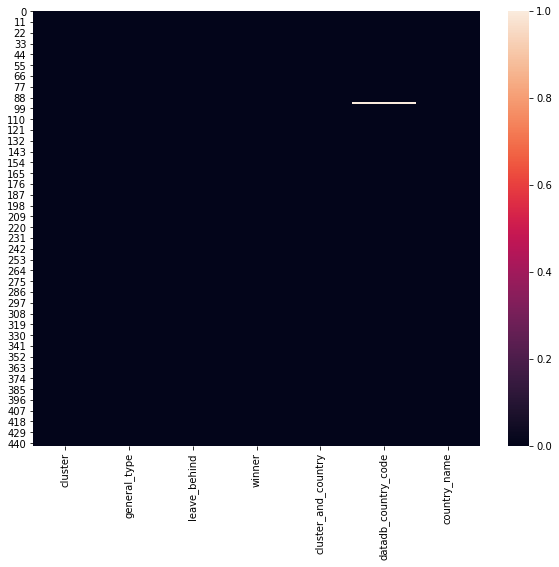

In [341]:
plt.figure(figsize=(10,8))
sns.heatmap(final_mobile_df_with_country_code.isnull())

In [342]:
final_mobile_df_with_country_code[final_mobile_df_with_country_code['datadb_country_code'].isnull()]

cluster general_type  leave_behind      winner cluster_and_country  \
94       4       Mobile         False       kayak             Namibia   
95       4       Mobile          True  skyscanner             Namibia   

   datadb_country_code country_name  
94                 NaN      Namibia  
95                 NaN      Namibia

### Fixing null values

In [343]:
final_mobile_df_with_country_code['datadb_country_code'][final_mobile_df_with_country_code['country_name'] == 'Namibia'] = 'NA'

C:\Users\idan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


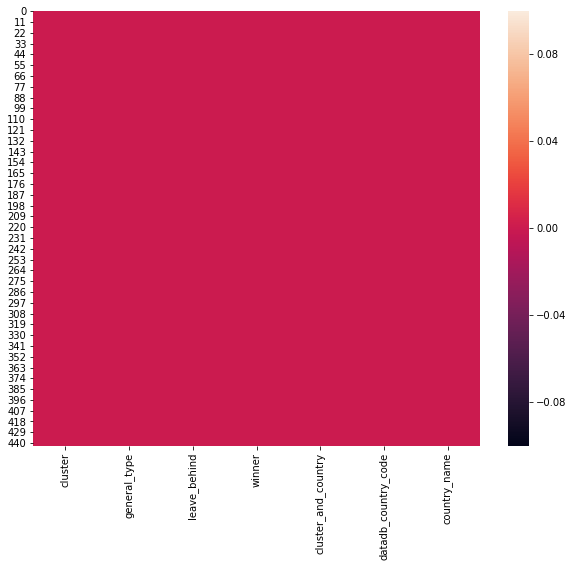

In [344]:
plt.figure(figsize=(10,8))
sns.heatmap(final_mobile_df_with_country_code.isnull())

### Merging partners code 

In [345]:
final_mobile_df_with_country_code['partners_code'] = final_mobile_df_with_country_code['winner'].map(partners_dict)

In [346]:
final_mobile_df_with_country_code.head()

cluster general_type  leave_behind      winner cluster_and_country  \
0       0       Mobile         False       kayak             Austria   
1       0       Mobile          True  skyscanner             Austria   
2       0       Mobile         False       kayak          Guadeloupe   
3       0       Mobile          True  skyscanner          Guadeloupe   
4       0       Mobile         False       kayak          Martinique   

  datadb_country_code country_name  partners_code  
0                  AT      Austria            5.0  
1                  AT      Austria            6.0  
2                  GP   Guadeloupe            5.0  
3                  GP   Guadeloupe            6.0  
4                  MQ   Martinique            5.0

In [347]:
final_mobile_df_with_country_code.drop(columns=['cluster', 'winner', 'cluster_and_country', 'country_name'], inplace=True)

In [349]:
final_mobile_df_with_country_code['leave_behind'] = final_mobile_df_with_country_code['leave_behind'].apply(lambda x: 'f' if x==False else 'b')

In [350]:
final_mobile_df_with_country_code.head(20)

general_type leave_behind datadb_country_code  partners_code
0        Mobile            f                  AT            5.0
1        Mobile            b                  AT            6.0
2        Mobile            f                  GP            5.0
3        Mobile            b                  GP            6.0
4        Mobile            f                  MQ            5.0
5        Mobile            b                  MQ            6.0
6        Mobile            f                  NZ            5.0
7        Mobile            b                  NZ            6.0
8        Mobile            f                  RE            5.0
9        Mobile            b                  RE            6.0
10       Mobile            f                  CH            5.0
11       Mobile            b                  CH            6.0
12       Mobile            f                  AW            1.0
13       Mobile            b                  AW            5.0
14       Mobile            f                  BE            1.0
15       Mobile            b                  BE            5.0
16       Mobile            f                  CZ            1.0
17       Mobile            b                  CZ            5.0
18       Mobile            f                  DO            1.0
19       Mobile            b                  DO            5.0

In [351]:
final_mobile_df_with_country_code.to_csv('mobile_matrix.csv', index=False)